# 데이터 시각화 
## Pandas & 데이터 시각화 실습

### 사용 데이터 : 52,000 Animation Movie Details (2024)

### 데이터 불러오기 및 라이브러리 import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
#윈도우에서
#font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#rc('font', family=font_name)

#맥에서
rc('font', family='AppleGothic')

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('Animation_Movies.csv')    #csv파일 불러오기 Kaggle Dataset활용

### 데이터 전처리 

In [4]:
df.columns      #총 23개의 열이 있음을 확인

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns', 23)    #23개의 열 모두 표시하기 위해 옵션을 설정
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,175000000,http://movies.disney.com/inside-out,tt2096673,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,/hGGC9gKo7CFE3fW07RA587e5kol.jpg,175000000,http://disney.go.com/disneypictures/up/,tt1049413,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,/vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg,The greatest adventure is just getting back home.,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,/h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg,94000000,http://movies.disney.com/finding-nemo,tt0266543,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,/ggQ6o8X5984OCh3kZi2UIJQJY5y.jpg,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,/askg3SMvhqEl4OL52YuvdtY40Yb.jpg,175000000,https://www.pixar.com/feature-films/coco,tt2380307,en,Coco,Despite his family’s baffling generations-old ...,166.578,/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg,The celebration of a lifetime,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,/fK5ssgvtI43z19FoWigdlqgpLRE.jpg,180000000,https://www.pixar.com/feature-films/walle/,tt0910970,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,/hbhFnRzzg6ZDmm8YAmxBnQpQIPh.jpg,After 700 years of doing what he was built for...,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English


In [6]:
df.info()       #데이터 유형과 null값을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51945 entries, 0 to 51944
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    51945 non-null  int64  
 1   title                 51944 non-null  object 
 2   vote_average          51945 non-null  float64
 3   vote_count            51945 non-null  int64  
 4   status                51945 non-null  object 
 5   release_date          49808 non-null  object 
 6   revenue               51945 non-null  int64  
 7   runtime               51945 non-null  int64  
 8   adult                 51945 non-null  bool   
 9   backdrop_path         15835 non-null  object 
 10  budget                51945 non-null  int64  
 11  homepage              8253 non-null   object 
 12  imdb_id               29552 non-null  object 
 13  original_language     51945 non-null  object 
 14  original_title        51944 non-null  object 
 15  overview           

In [7]:
df.drop(['backdrop_path', 'poster_path', 'id', 'overview', 'homepage', 'tagline', 'imdb_id'], axis=1, inplace=True) #inplace=True를 통하여 원본데이터프레임 수정

In [8]:
df.head()

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages
0,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,175000000,en,Inside Out,107.292,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,Up,7.949,18857,Released,2009-05-28,735099082,96,False,175000000,en,Up,90.968,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,94000000,en,Finding Nemo,55.456,"Animation, Family",Pixar,United States of America,English
3,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,175000000,en,Coco,166.578,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,180000000,en,WALL·E,58.517,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English


In [9]:
df.loc[df.duplicated()]     #중복 행 확인

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages
26479,Entre Elle & Lui - 11 A la fin du 1er trimestre,0.0,0,Released,NaN,0,0,False,0,fr,Entre Elle & Lui - 11 A la fin du 1er trimestre,0.6,Animation,NaN,NaN,NaN
29741,Haïku,0.0,0,Released,2001-01-01,0,1,False,0,en,Haïku,0.6,Animation,NaN,Belgium,No Language
45068,The Head Saves The Earth,0.0,0,Released,1995-09-12,0,110,False,0,en,The Head Saves The Earth,0.6,"Science Fiction, Comedy, Animation","MTV Animation, Fogelmania Productions",NaN,NaN


In [10]:
df.drop([26479, 29741, 45068], inplace=True)        #중복 행 제거

In [11]:
df.loc[df.duplicated()]     #중복 행이 잘 삭제되었는지 확인

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages


In [12]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d') #release_data를 데이터프레임형식으로 지정하여 다시 release_data에 저장

In [13]:
genre = {}
for row in df["genres"].str.split(","): # 장르열을 쉼표로 분할해 장르별 등장 횟수를 위에 만든 딕셔너리에 저장
    for word in row:
        word = word.strip() #공백제거
        if word in genre:
            genre[word] += 1 #이미 존재하는 장르라면 1을 추가
        else:
            genre[word] = 1 #없는 장르라면 장르를 생성하고 1로 초기화
genresDf = pd.DataFrame.from_dict([genre]).T.sort_values(by=0, ascending=False).head(10) #장르를 저장한 딕셔너리를 데이터프레임화 열과 행을 변경, 내림차순, 상위10개의 정보 추출

In [14]:
genresDf.drop('Animation', inplace=True) #애니메이션은 모두 공통된 장르이기에 장르 내 애니메이션을 삭제

In [15]:
genresDf    #상위 10개의 장르출력

,0
Comedy,7878
Family,7480
Fantasy,3896
Adventure,3539
Drama,2849
Science Fiction,2539
Action,2428
Documentary,1897
Music,1697


### 데이터 시각화

In [16]:
#각 언어의 등장 횟수를 계산하고 내림차순으로 정렬후 상위10개의 언어를 출력
Top10Lang = df.groupby('original_language').size().sort_values(ascending=False).head(10)
Top10Lang

original_language
en    28582
ja     5330
fr     2997
ru     2871
es     1472
de     1266
xx     1011
zh     1000
pt      947
pl      759
dtype: int64

In [17]:
#Top10Lang 을 rename해 번역
Top10Lang = Top10Lang.rename(index={'en': '영어', 'ja': '일본어', 'ru': '러시아어', 'fr': '프랑스어', 'es': '스페인어', 'de': '독일어', 'xx': '언어없음', 'zh': '중국어', 'pt': '포르투갈어', 'pl': '폴란드어'})
Top10Lang

original_language
영어       28582
일본어       5330
프랑스어      2997
러시아어      2871
스페인어      1472
독일어       1266
언어없음      1011
중국어       1000
포르투갈어      947
폴란드어       759
dtype: int64

In [18]:
#동일한 방법으로 10개의 영화사 및 제작국가도 추출
Top10Company = df.groupby('production_companies').size().sort_values(ascending=False).head(10)
Top10Company  

production_companies
ONF | NFB                       717
Soyuzmultfilm                   657
Walt Disney Productions         555
Walter Lantz Productions        511
Fleischer Studios               399
Tokyo University of the Arts    339
Famous Studios                  335
Terrytoons                      287
Kyivnaukfilm                    274
DePatie-Freleng Enterprises     272
dtype: int64

In [19]:
Top10Country = df.groupby('production_countries').size().sort_values(ascending=False).head(10)
Top10Country

production_countries
United States of America    12836
Japan                        5182
France                       2136
United Kingdom               1854
Canada                       1616
Soviet Union                 1556
Germany                       980
Russia                        828
Poland                        711
China                         628
dtype: int64

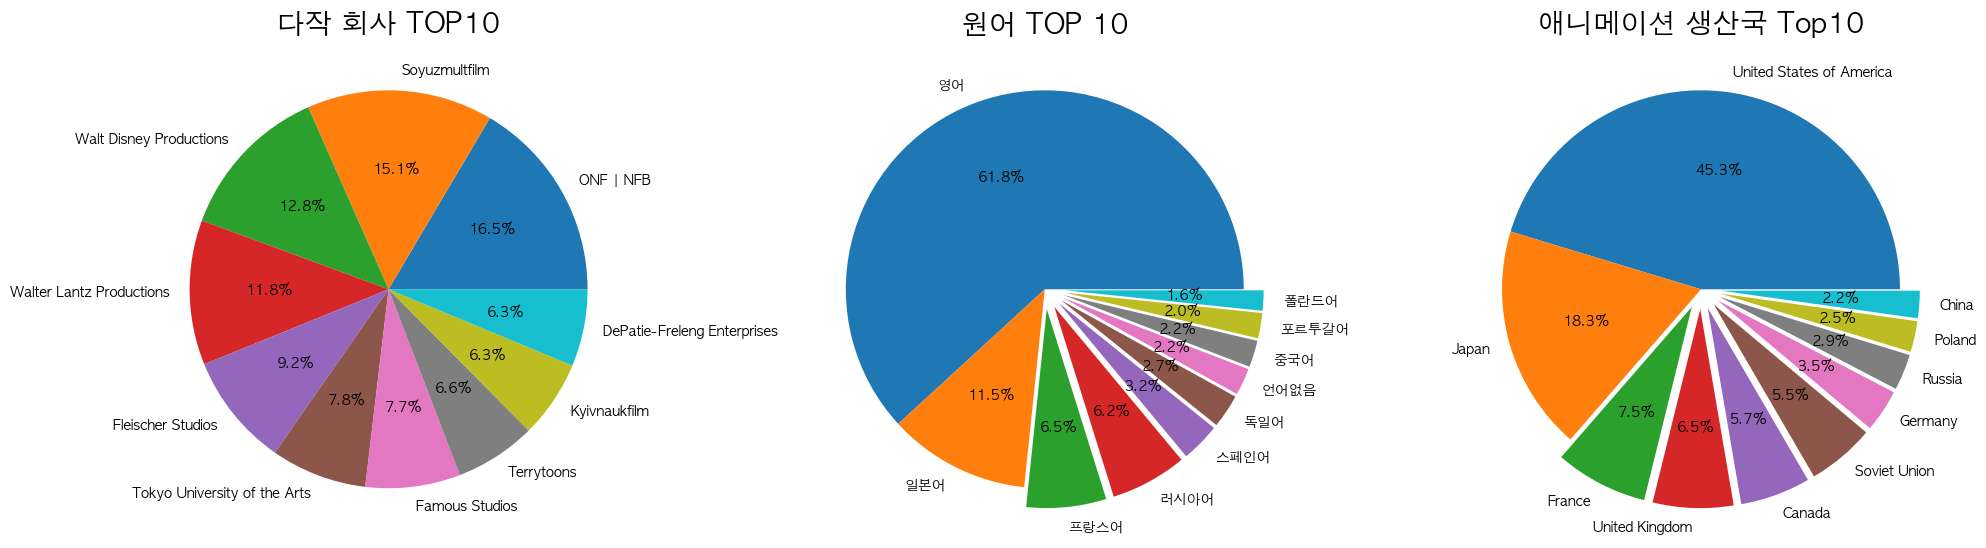

In [20]:
plt.figure(figsize=(20, 10))    #사이즈조절

plt.subplot(1, 3, 1)        #subplot 크기 및 위치 지정
plt.title('다작 회사 TOP10', fontsize=20, fontweight='bold')
plt.pie(Top10Company, labels=Top10Company.index, autopct='%1.1f%%')

plt.subplot(1, 3, 2)    
plt.title('원어 TOP 10', fontsize=20, fontweight='bold')
wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 2}
explode = [0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.pie(Top10Lang, labels=Top10Lang.index, autopct='%1.1f%%', explode=explode)

plt.subplot(1, 3, 3)
plt.title('애니메이션 생산국 Top10', fontsize=20, fontweight='bold')
plt.pie(Top10Country, labels=Top10Country.index, autopct='%1.1f%%', explode=explode)

plt.tight_layout()      #subplot간의 간격을 자동으로 조절해준다
plt.show()

In [21]:
highGrossingMovies = df[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(10) #수익(revenue) 열을 내림차 순으로 정렬하고 상위 10개 추출
highBudgetMovies = df[['title', 'budget']].sort_values(by='budget', ascending=False).head(10) #예산(budget) 열을 내림차 순으로 정렬하고 상위 10개 추출
longestMovies = df[['title', 'runtime']].sort_values(by='runtime', ascending=False).head(10) #상영시간(runtime) 열을 내림차 순으로 정렬하고 상위 10개 추출
mostPopularMovies = df[['title', 'popularity']].sort_values(by='popularity', ascending=False).head(10) #인기도(popularity) 열을 내림차 순으로 정렬하고 상위 10개 추출

/var/folders/zy/q5wzz21s04x4lr52n6t2zq080000gn/T/ipykernel_68480/2362022548.py:28: UserWarning: Glyph 244 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX}) missing from current font.
  plt.tight_layout()  #서브플롯 간의 간격을 자동으로 조정
/Users/jaewoo/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 244 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


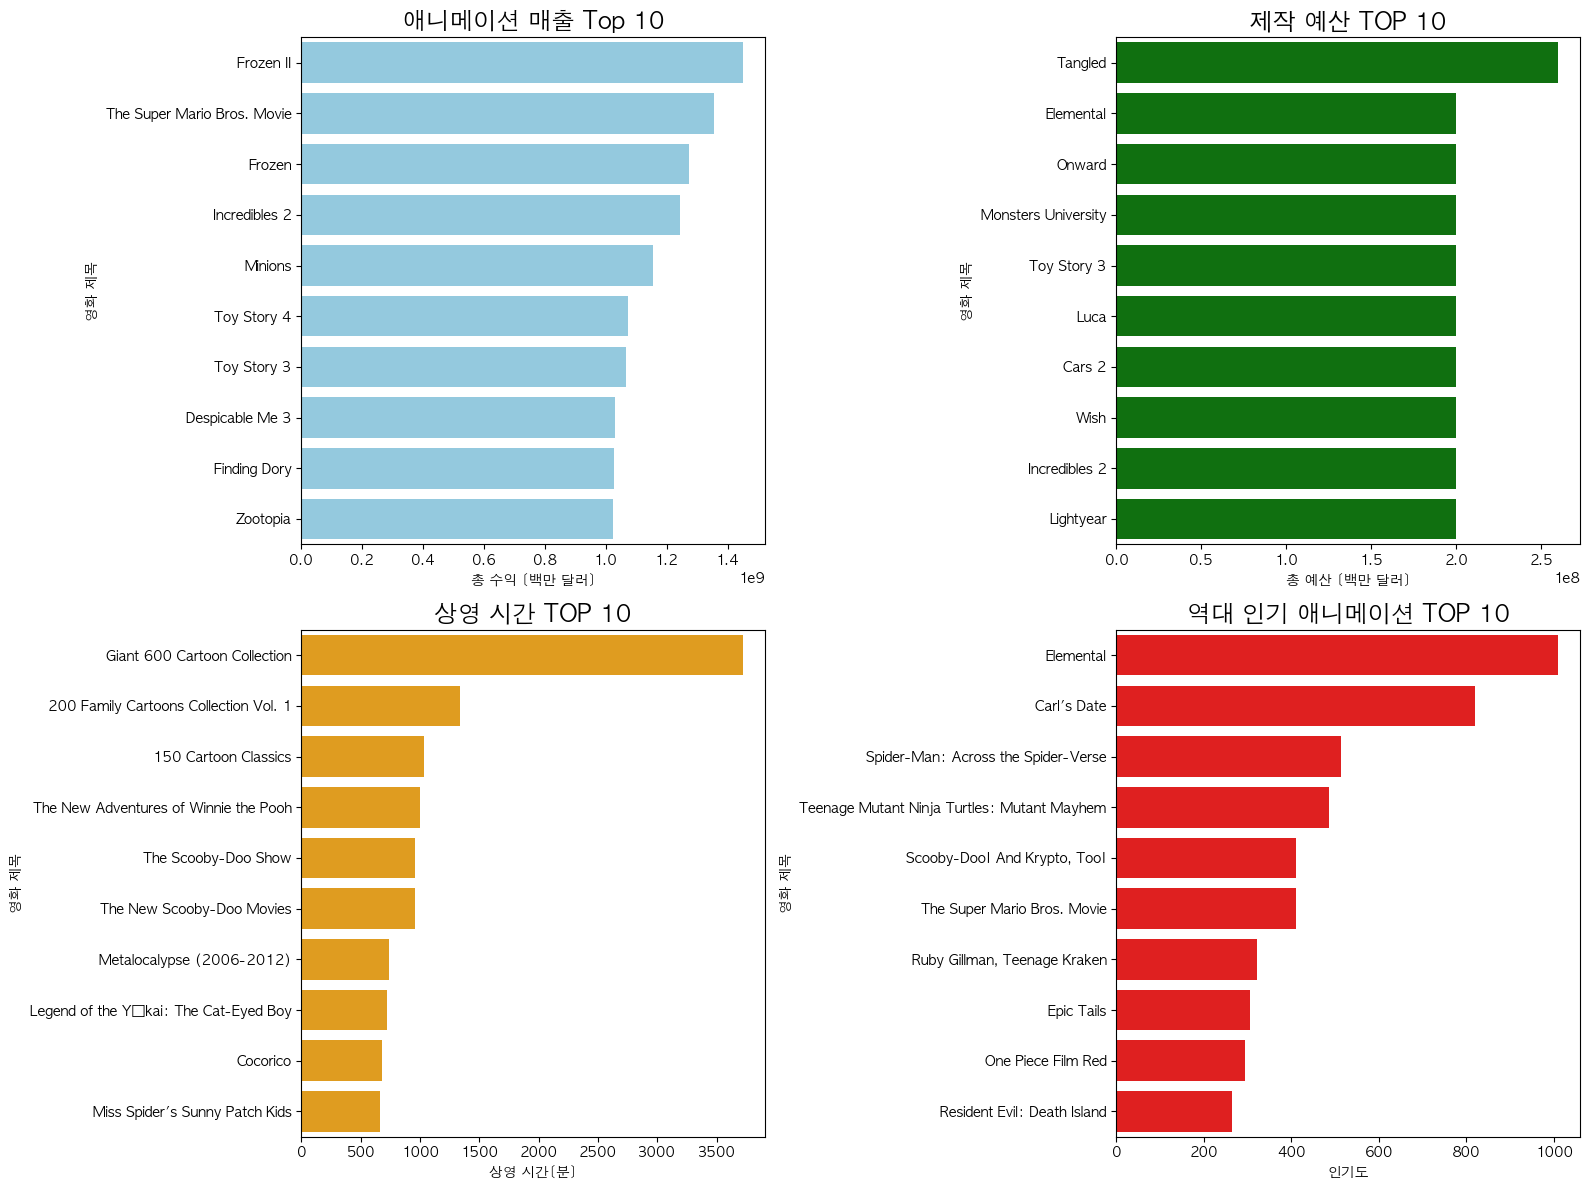

In [28]:
#위와 동일한 방법으로 애니메이션 매출, 제작예산, 제일 긴 상영시간을 가진 애니메이션, 역대 인기 애니메이션을 출력
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.title("애니메이션 매출 Top 10", fontsize=17,fontweight='bold')
sns.barplot(data=highGrossingMovies, y='title', x='revenue', orient='h', color= 'skyblue')
plt.xlabel('총 수익 [백만 달러]',fontweight='bold')
plt.ylabel("영화 제목",fontweight='bold')

plt.subplot(2, 2, 2)
plt.title('제작 예산 TOP 10', fontsize=17,fontweight='bold')
sns.barplot(data=highBudgetMovies, y='title', x='budget', orient='h', color= 'green')
plt.xlabel('총 예산 [백만 달러]',fontweight='bold')
plt.ylabel('영화 제목',fontweight='bold')

plt.subplot(2, 2, 3)
plt.title('상영 시간 TOP 10', fontsize=17,fontweight='bold')
sns.barplot(data=longestMovies, y='title', x='runtime', orient='h', color='orange')
plt.xlabel('상영 시간[분]',fontweight='bold')
plt.ylabel('영화 제목',fontweight='bold')

plt.subplot(2, 2, 4)
plt.title('역대 인기 애니메이션 TOP 10', fontsize=17,fontweight='bold')
sns.barplot(data=mostPopularMovies, y='title', x='popularity', orient='h', color='red')
plt.xlabel('인기도',fontweight='bold')
plt.ylabel('영화 제목',fontweight='bold')

plt.tight_layout()  #서브플롯 간의 간격을 자동으로 조정
plt.show()

In [23]:
# 데이터를 추출 후 그래프를 확인해보니 영어로 적혀있어 가독성이 떨어져 40개의 자료에 대한 번역작업 후 다시 시각화
english_to_korean = {
    'Zootopia': '주토피아',
    'Finding Dory': '도리를 찾아서',
    'Despicable Me 3': '슈퍼배드 3',
    'Toy Story 3': '토이 스토리 3',
    'Toy Story 4': '토이 스토리 4',
    'Minions': '미니언즈',
    'Incredibles 2': '인크레더블 2',
    'Frozen': '겨울왕국',
    'Frozen II': '겨울왕국 2',
    'Tangled': '라푼젤',
    'Elemental': '엘리멘탈',
    'Onward': '온워즈',
    'Monsters University': '몬스터 대학교',
    'Luca': '루카',
    'Cars 2': '카 2',
    'Wish': 'Wish',
    'Lightyear': '버즈 라이트이어',
    'Giant 600 Cartoon Collection': '거대한 600 만화 컬렉션',
    '200 Family Cartoons Collection Vol. 1': '200 가족 만화 컬렉션 Vol. 1',
    '150 Cartoon Classics': '150 만화 클래식',
    'The New Adventures of Winnie the Pooh': '곰돌이 푸의 새로운 모험',
    'The Scooby-Doo Show': '스쿠비 두 쇼',
    'The New Scooby-Doo Movies': '뉴 스쿠비 두 무비',
    'Metalocalypse (2006-2012)': '메탈로캘립스 (2006-2012)',
    'Legend of the Yôkai: The Cat-Eyed Boy': '요카이 전설: 고양이 눈의 소년',
    'Cocorico': '코코리코',
    "Miss Spider's Sunny Patch Kids": '미스 스파이더의 써니 패치 키즈',
    'Elemental': '엘리멘탈',
    "Carl's Date": '칼의 데이트',
    'Spider-Man: Across the Spider-Verse': '스파이더맨: 어크로스 더 유니버스',
    'Teenage Mutant Ninja Turtles: Mutant Mayhem': '닌자터틀: 뮤턴트 대소동',
    'Scooby-Doo! And Krypto, Too!': '스쿠비 두! 그리고 크립토도!',
    'The Super Mario Bros. Movie': '슈퍼 마리오 브라더스',
    'Ruby Gillman, Teenage Kraken': '루비 길만, 틴에이지 크라켄',
    'Epic Tails': '에픽 테일즈',
    'One Piece Film Red': '원피스 필름 : 레드',
    'Resident Evil: Death Island': '레지던트 이블: 데스 아일랜드'

}

# 상위 10개 데이터프레임의 제목을 한국어로 번역
translated_highGrossingMovies = highGrossingMovies.replace({'title': english_to_korean})
translated_highBudgetMovies = highBudgetMovies.replace({'title': english_to_korean})
translated_longestMovies = longestMovies.replace({'title': english_to_korean})
translated_mostPopularMovies = mostPopularMovies.replace({'title': english_to_korean})

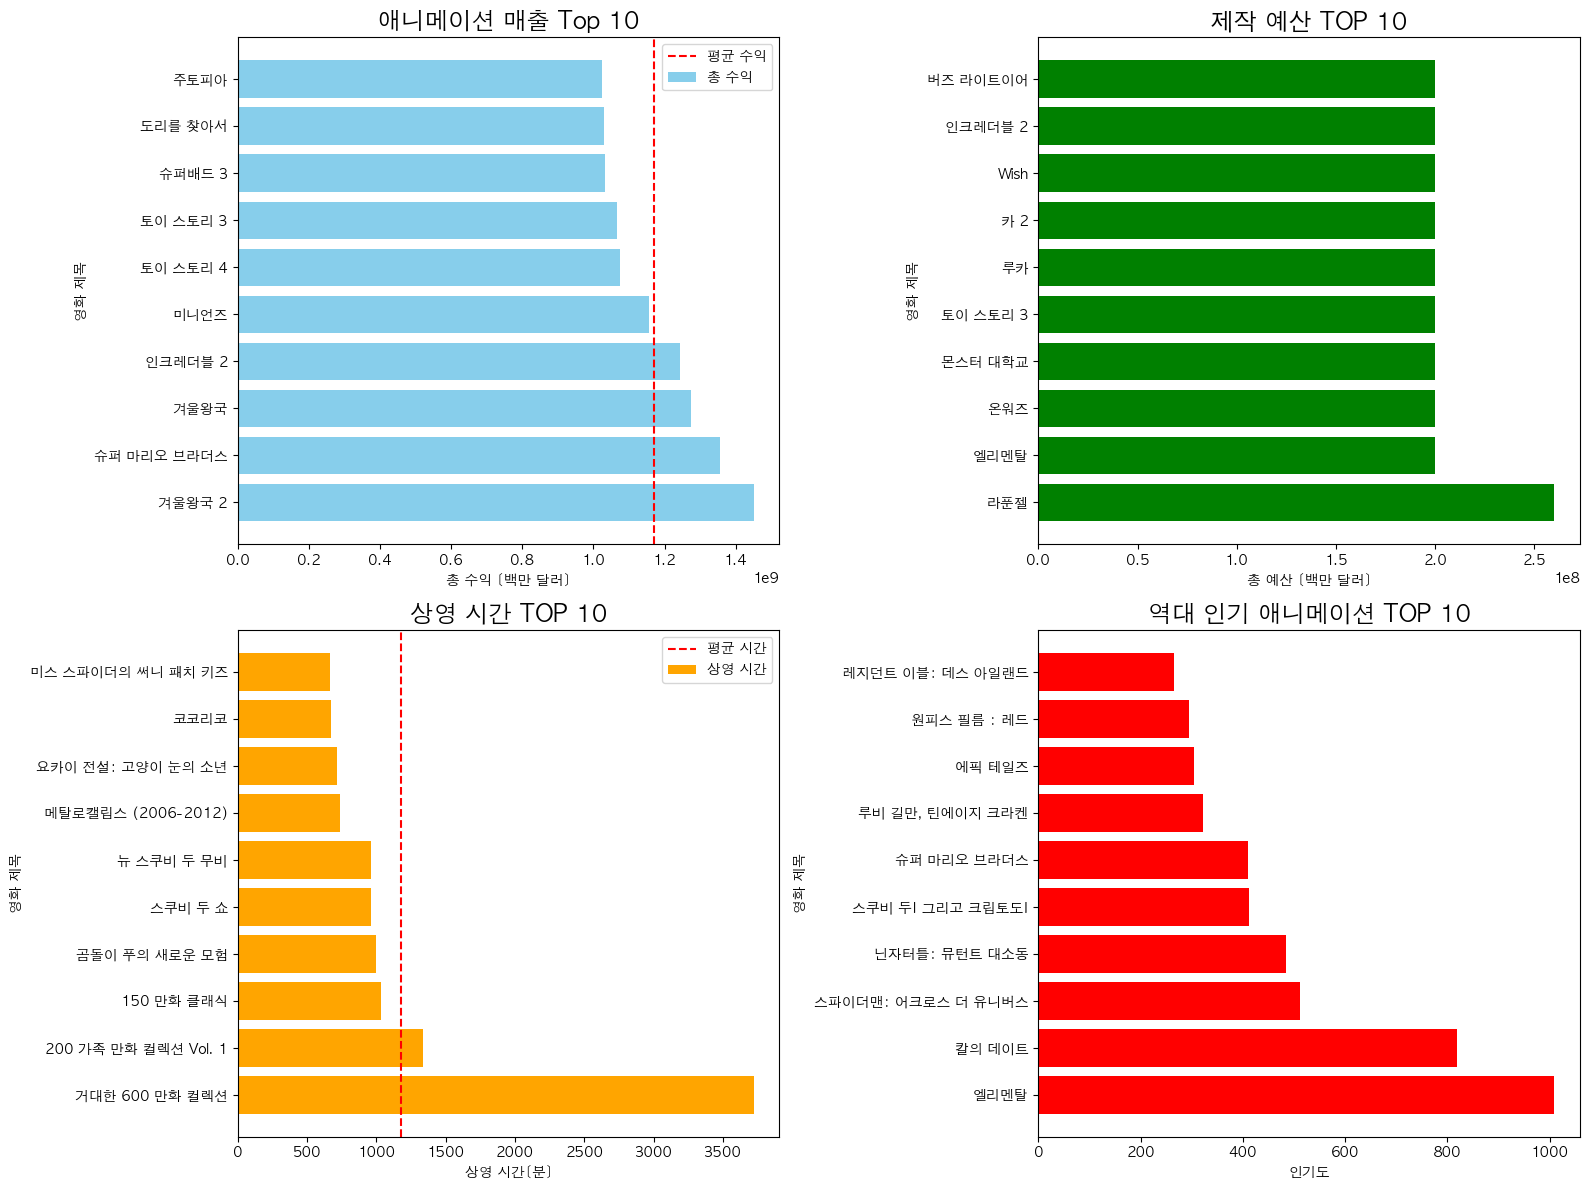

In [29]:
# 그래프 크기 설정
plt.figure(figsize=(16, 12))
top_10_revenues = highGrossingMovies['revenue']
average_revenue = top_10_revenues.mean()
plt.subplot(2, 2, 1)  # 첫 번째 서브플롯 선택
plt.title("애니메이션 매출 Top 10", fontsize=17,fontweight='bold')
plt.barh(translated_highGrossingMovies['title'], highGrossingMovies['revenue'], color='skyblue', label = '총 수익')
plt.axvline(x=average_revenue, color='red', linestyle='--', label='평균 수익')  # 평균 수익 선 추가
plt.xlabel('총 수익 [백만 달러]',fontweight='bold')
plt.ylabel("영화 제목",fontweight='bold')
plt.legend()

plt.subplot(2, 2, 2)
plt.title('제작 예산 TOP 10', fontsize=17,fontweight='bold')
plt.barh(translated_highBudgetMovies['title'], highBudgetMovies['budget'], color='green')
plt.xlabel('총 예산 [백만 달러]',fontweight='bold')
plt.ylabel('영화 제목',fontweight='bold')

top_10_runtime = longestMovies['runtime']
average_runtime = top_10_runtime.mean()
plt.subplot(2, 2, 3)
plt.title('상영 시간 TOP 10', fontsize=17,fontweight='bold')
plt.barh(translated_longestMovies['title'], longestMovies['runtime'], color='orange', label = '상영 시간')
plt.axvline(x=average_runtime, color='red', linestyle='--', label='평균 시간')  # 평균 시간 선 추가
plt.xlabel('상영 시간[분]',fontweight='bold')
plt.ylabel('영화 제목',fontweight='bold')
plt.legend()

plt.subplot(2, 2, 4)
plt.title('역대 인기 애니메이션 TOP 10', fontsize=17,fontweight='bold')
plt.barh(translated_mostPopularMovies['title'], mostPopularMovies['popularity'], color='red')
plt.xlabel('인기도',fontweight='bold')
plt.ylabel('영화 제목',fontweight='bold')

plt.tight_layout()  # 서브플롯 간의 간격을 자동으로 조정
plt.show()

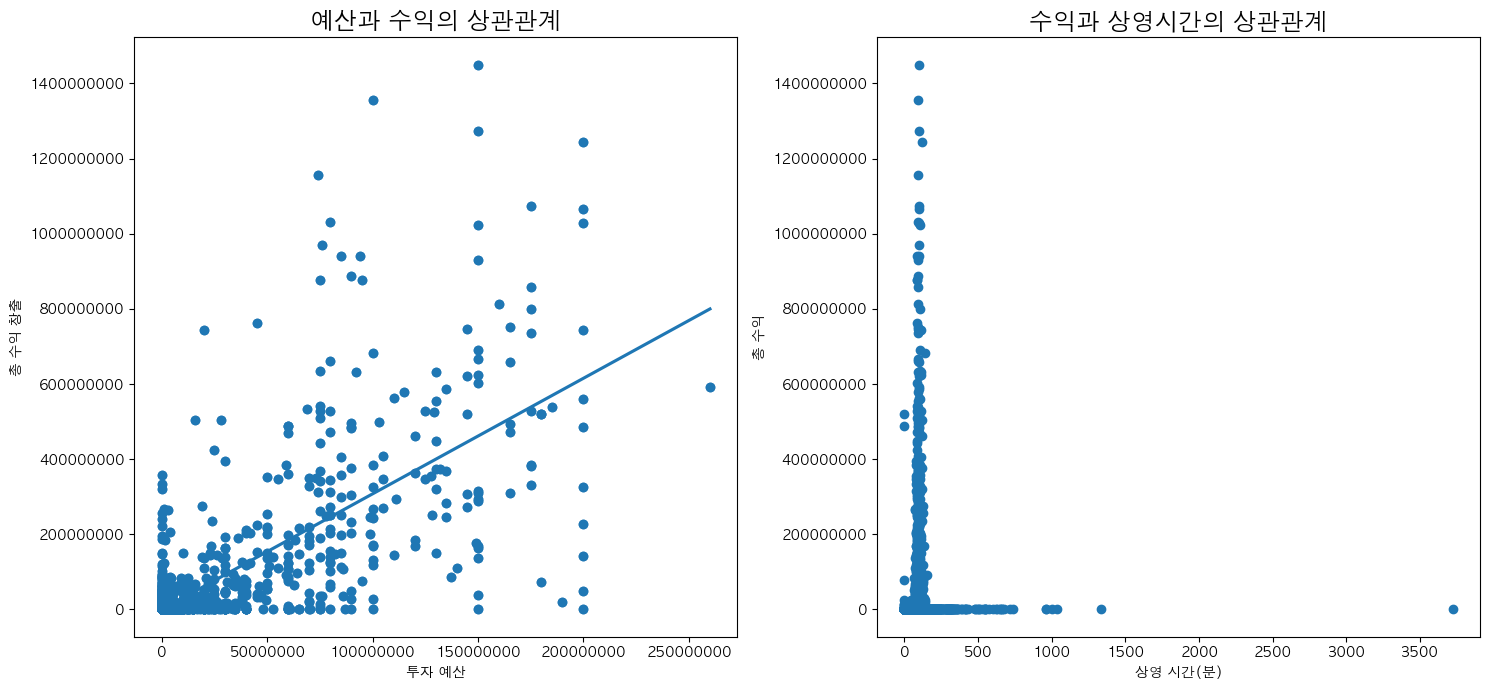

In [25]:
#데이터 하나가 아닌 지금까지 출력한 데이터를 합쳐 예산과 수익 그리고 수익과 상영시간에 대한 관계를 시각화.
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.scatter(df['budget'], df['revenue'])
sns.regplot(x='budget', y='revenue',data=df, ci=None)
plt.ticklabel_format(style='plain')
plt.xlabel('투자 예산',fontweight='bold')
plt.ylabel('총 수익 창출',fontweight='bold')
plt.title('예산과 수익의 상관관계', fontsize=17,fontweight='bold')

plt.subplot(1, 2, 2)
plt.scatter(df['runtime'], df['revenue'])
plt.ticklabel_format(style='plain')
plt.xlabel('상영 시간(분)',fontweight='bold')
plt.ylabel('총 수익',fontweight='bold')
plt.title('수익과 상영시간의 상관관계', fontsize=17,fontweight='bold')

plt.tight_layout()
plt.show()

#### 투자예산이 증가하면 더 큰 수익창출을 기대할 순 있지만 많은 예산을 투자하면 무조건 성공하는게 아니란걸 알 수 있음. 
#### 또한 적절한 상영시간이 많은 수익을 얻을 수 있다는게 수익과 상영시간의 상관관계 그래프에서 볼 수 있음

In [26]:
releaseYear = df.groupby(df.release_date.dt.year)['title'].count()  #각 년도별 개봉한 영화를 카운트

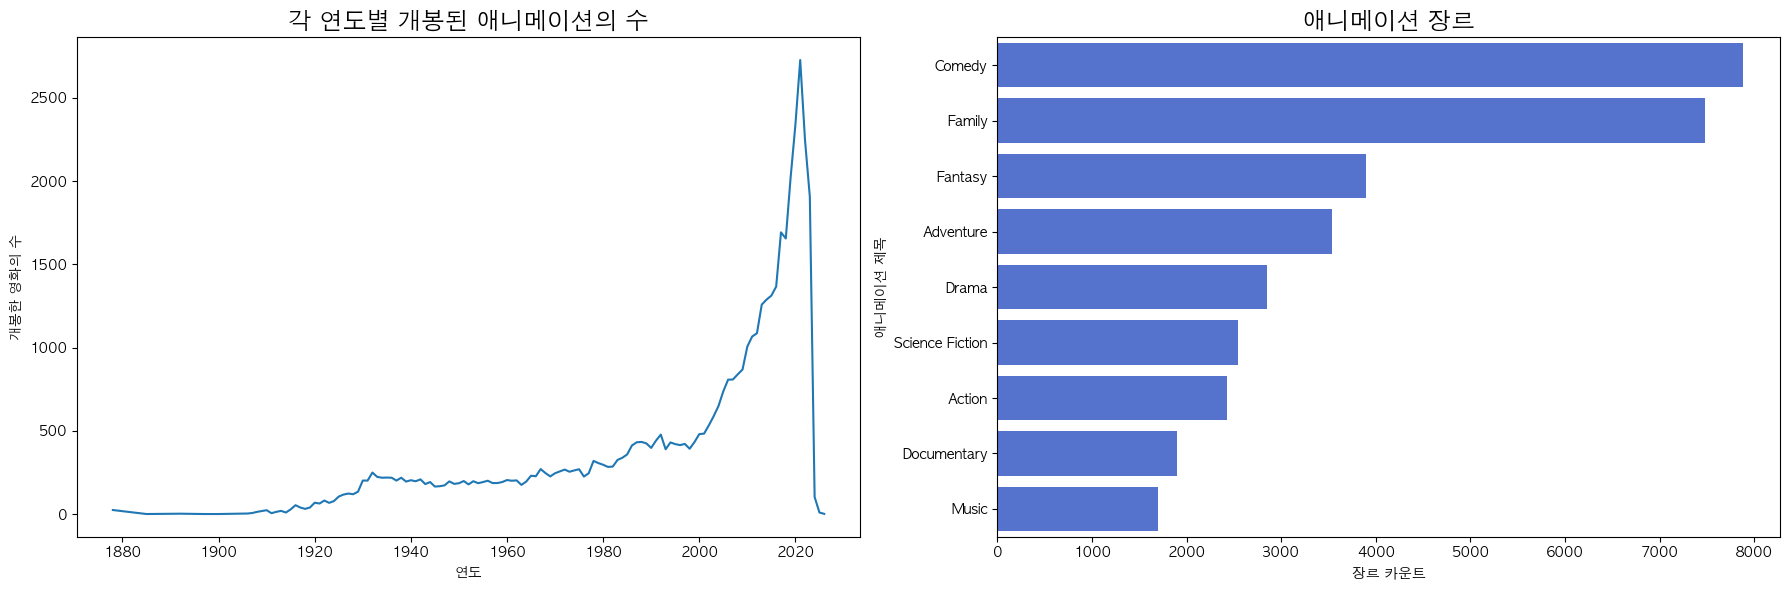

In [30]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
releaseYear.plot()
plt.title("각 연도별 개봉된 애니메이션의 수", fontsize=17,fontweight='bold')
plt.ylabel("개봉한 영화의 수",fontweight='bold')
plt.xlabel("연도",fontweight='bold')

plt.subplot(1, 2, 2)
sns.barplot(data=genresDf, y=genresDf.index, x=0, orient='h', color='royalblue')
plt.title("애니메이션 장르", fontsize=17,fontweight='bold')
plt.xlabel('장르 카운트',fontweight='bold')
plt.ylabel('애니메이션 제목',fontweight='bold')

plt.tight_layout()
plt.show()

#### 매년 애니메이션의 수는 증가하는 추세이고 2000년도를 넘어서는 폭발적으로 증가함을 볼 수 있다.
#### 대부분의 애니메이션은 아이들을 대상으로 제작하기에 Comedy와 Family 두 장르의 비율이 압도적으로 많음을 확인할 수 있다.

# Q&A